In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='ISO-8859-1', names = ['target','id','date','flag','user','text'])

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [ ]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

df[['text', 'word_count']].head()

,text,word_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",19
1,is upset that he can't update his Facebook by ...,21
2,@Kenichan I dived many times for the ball. Man...,18
3,my whole body feels itchy and like its on fire,10
4,"@nationwideclass no, it's not behaving at all....",21


In [ ]:
avg_positive_word_count = df[df['target'] == 4]['word_count'].mean()
avg_negative_word_count = df[df['target'] == 0]['word_count'].mean()

print(f"Average number of words in positive texts: {avg_positive_word_count}")
print(f"Average number of words in negative texts: {avg_negative_word_count}")
df.drop(columns=['word_count'], inplace=True)

Average number of words in positive texts: 12.7703175
Average number of words in negative texts: 13.58198375


In [ ]:
df['day'] = pd.to_datetime(df['date']).dt.day
df['month'] = pd.to_datetime(df['date']).dt.month
df['day_name'] = pd.to_datetime(df['date']).dt.day_name()

# Display the updated dataframe
df.head()

/tmp/ipykernel_35/2266425788.py:1: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['day'] = pd.to_datetime(df['date']).dt.day
/tmp/ipykernel_35/2266425788.py:2: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string without the timezone, then use .tz_localize to convert to a recognized timezone.
  df['month'] = pd.to_datetime(df['date']).dt.month
/tmp/ipykernel_35/2266425788.py:3: FutureWarning: Parsed string "Mon Apr 06 22:19:45 PDT 2009" included an un-recognized timezone "PDT". Dropping unrecognized timezones is deprecated; in a future version this will raise. Instead pass the string wit

,target,id,date,flag,user,text,day,month,day_name
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",6,4,Monday
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,6,4,Monday
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,6,4,Monday
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,6,4,Monday
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",6,4,Monday


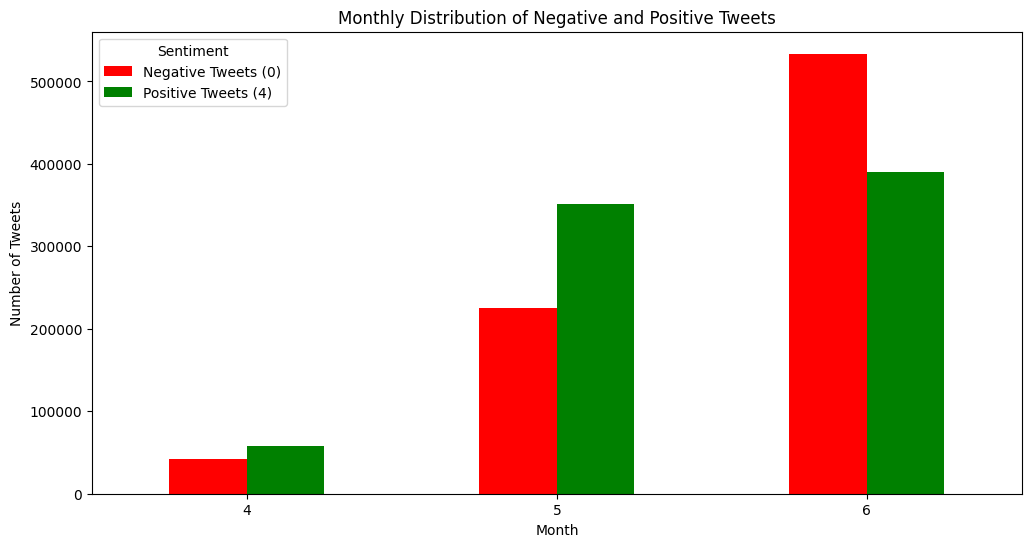

In [ ]:
monthly_sentiment_counts = df.groupby(['month', 'target']).size().unstack()

# Plot the data
monthly_sentiment_counts.plot(kind='bar', figsize=(12, 6), color=['red', 'green'])
plt.title("Monthly Distribution of Negative and Positive Tweets")
plt.xlabel("Month")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=0)
plt.legend(["Negative Tweets (0)", "Positive Tweets (4)"], title="Sentiment")
plt.show()

           Negative Tweets   Positive Tweets
day_name                                    
Friday               114600           110994
Monday               132539           177666
Saturday             157734           173221
Sunday               145471           199084
Thursday              80132            25903
Tuesday              101051            84799
Wednesday             68473            28333


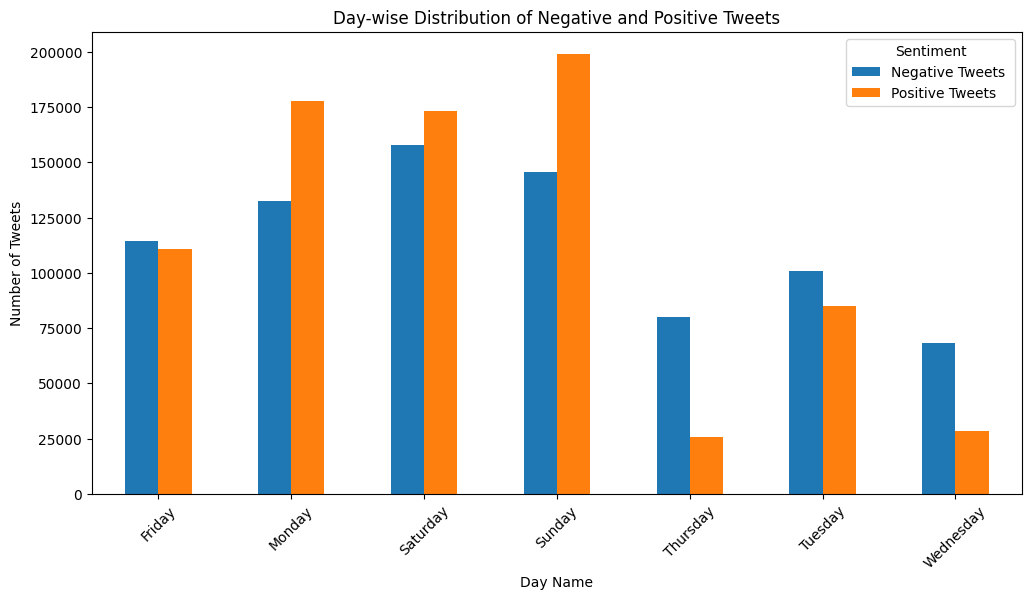

In [ ]:
daywise_sentiment_counts = df.groupby(['day_name', 'target']).size().unstack()

# Rename columns
daywise_sentiment_counts.columns = ['Negative Tweets ', 'Positive Tweets']

# Display the result
print(daywise_sentiment_counts)

# Visualize the data
daywise_sentiment_counts.plot(kind='bar', figsize=(12, 6))
plt.title("Day-wise Distribution of Negative and Positive Tweets")
plt.xlabel("Day Name")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.legend(title="Sentiment")
plt.show()

user
lost_dog           549
webwoke            345
tweetpet           310
SallytheShizzle    281
VioletsCRUK        279
mcraddictal        276
tsarnick           248
what_bugs_u        246
Karen230683        238
DarkPiano          236
Name: count, dtype: int64


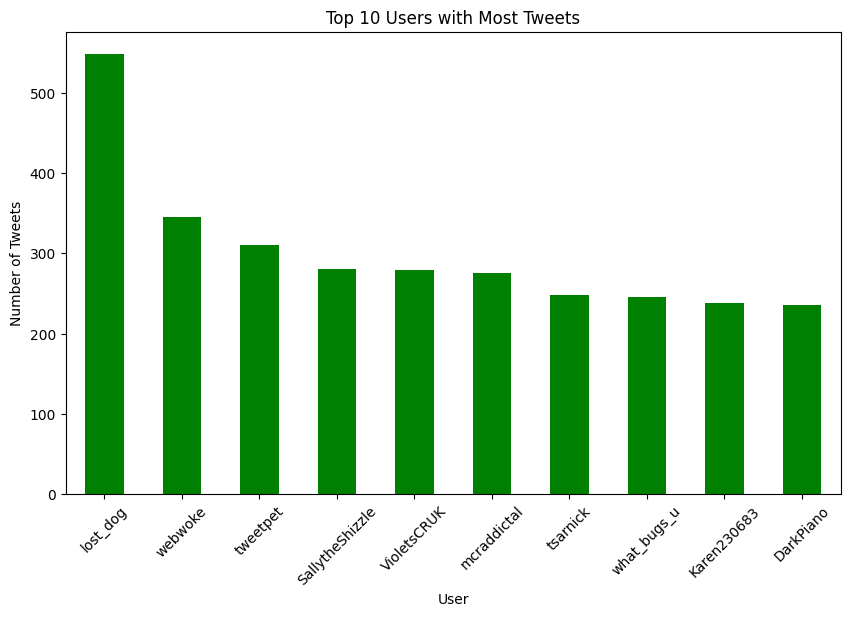

In [ ]:
user_tweet_counts = df['user'].value_counts()

# Extract the top 10 users with the most tweets
top_10_users = user_tweet_counts.head(10)

# Display the top 10 users and their tweet counts
print(top_10_users)

# Optional: Visualize the top 10 users with a bar chart
top_10_users.plot(kind='bar', color='green', figsize=(10, 6))
plt.title("Top 10 Users with Most Tweets")
plt.xlabel("User")
plt.ylabel("Number of Tweets")
plt.xticks(rotation=45)
plt.show()

In [ ]:
negative_tweets = df[df['target'] == 0]
positive_tweets = df[df['target'] == 4]

# Count tweets by user for negative and positive tweets
negative_user_counts = negative_tweets['user'].value_counts().head(5)
positive_user_counts = positive_tweets['user'].value_counts().head(5)

# Print the results
print("Top 5 users with most negative tweets:")
print(negative_user_counts)

print("\nTop 5 users with most positive tweets:")
print(positive_user_counts)

Top 5 users with most negative tweets:
user
lost_dog       549
tweetpet       310
webwoke        264
mcraddictal    210
wowlew         210
Name: count, dtype: int64

Top 5 users with most positive tweets:
user
what_bugs_u    246
DarkPiano      231
VioletsCRUK    218
tsarnick       212
keza34         211
Name: count, dtype: int64


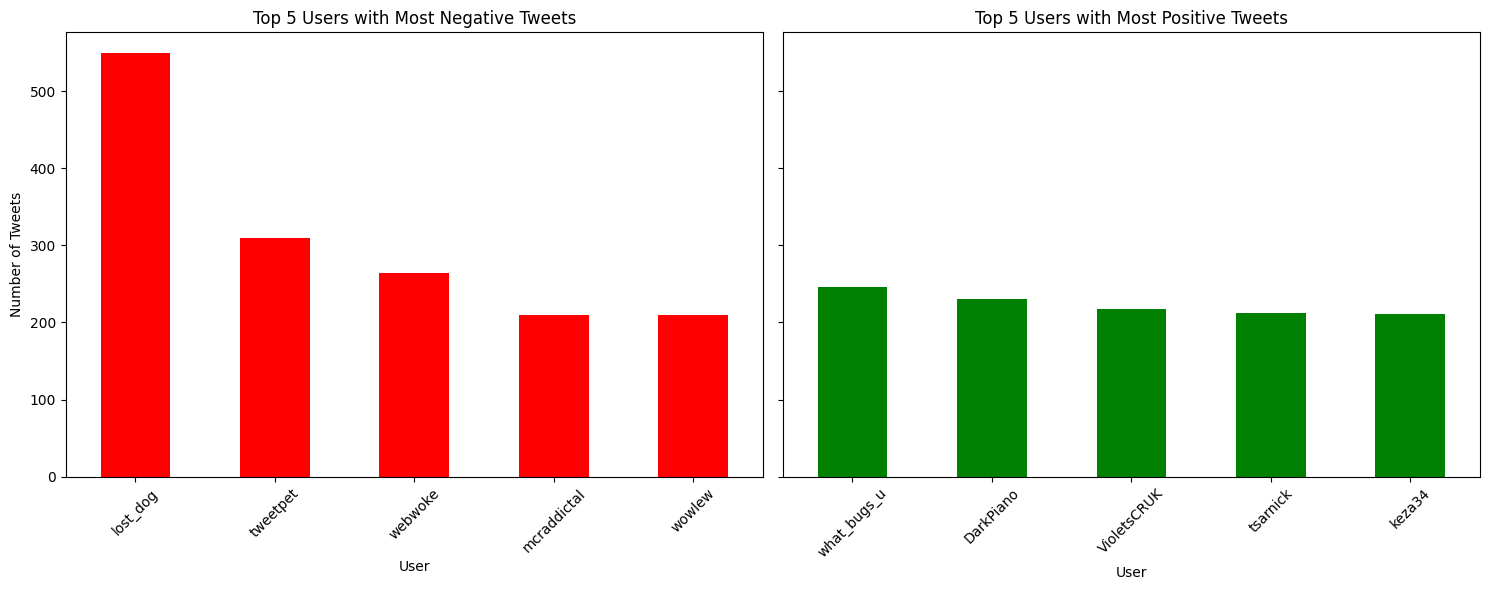

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Negative tweets
negative_user_counts.plot(kind='bar', ax=axes[0], color='red')
axes[0].set_title("Top 5 Users with Most Negative Tweets")
axes[0].set_xlabel("User")
axes[0].set_ylabel("Number of Tweets")
axes[0].tick_params(axis='x', rotation=45)

# Positive tweets
positive_user_counts.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title("Top 5 Users with Most Positive Tweets")
axes[1].set_xlabel("User")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
user_tweet_counts = df.groupby('user').size().reset_index(name='tweet_count')

# Define bins and labels for the ranges
bins = [0,5,10,15,20,25, 50, 100, 150, 200, 250, float('inf')]
labels = ['1-5','6-10','11-15','16-20','21-25','25-50', '51-100', '101-150', '151-200', '201-250', '250+']

# Categorize tweet counts into ranges
user_tweet_counts['tweet_range'] = pd.cut(user_tweet_counts['tweet_count'], bins=bins, labels=labels, right=True)

# Count the number of users in each range
range_counts = user_tweet_counts['tweet_range'].value_counts().sort_index()

# Display the result
print(range_counts)

tweet_range
1-5        609202
6-10        31975
11-15        9025
16-20        3848
21-25        1936
25-50        2912
51-100        716
101-150       109
151-200        31
201-250        15
250+            6
Name: count, dtype: int64


In [ ]:
df.drop(['flag','id','user','date','day','month','day_name'], axis=1, inplace=True)
df

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import re

In [ ]:
emoticon_dict = {
    ":)": "smile",
    ":(": "sad",
    ":D": "laugh",
    ";)": "wink",
    ":P": "playful",
    ":'(": "crying",
    ":O": "surprised",
    "XD": "laughing",
    "<3": "love"
}

# Function to replace emoticons with their meanings
def replace_emoticons(text):
    for emoticon, meaning in emoticon_dict.items():
        text = text.replace(emoticon, meaning)
    return text

# Apply the function to the 'text' column
df['text'] = df['text'].apply(replace_emoticons)

# Display the updated dataframe
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove punctuations
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    if 'not' in stop_words:  # Ensure 'not' is not removed
        stop_words.remove('not')
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    snow_stemmer = SnowballStemmer(language='english')
    tokens = [snow_stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)

In [ ]:
df['processed_text'] = df['text'].apply(preprocess_text)
df.head()

,target,text,processed_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot that bummer shoulda got david carr ...
1,0,is upset that he can't update his Facebook by ...,upset cant updat facebook text might cri resul...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save 50 res...
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass not behav im mad cant see


In [ ]:
# Count the number of words in each processed text
df['word_count'] = df['processed_text'].apply(lambda x: len(x.split()))

# Display the updated dataframe
df[['processed_text', 'word_count']].head()

,processed_text,word_count
0,switchfoot that bummer shoulda got david carr ...,9
1,upset cant updat facebook text might cri resul...,12
2,kenichan dive mani time ball manag save 50 res...,11
3,whole bodi feel itchi like fire,6
4,nationwideclass not behav im mad cant see,7


In [ ]:
avg_positive_word_count = df[df['target'] == 4]['word_count'].mean()
avg_negative_word_count = df[df['target'] == 0]['word_count'].mean()

print(f"Average number of words in positive texts: {avg_positive_word_count}")
print(f"Average number of words in negative texts: {avg_negative_word_count}")
df.drop(columns=['word_count'], inplace=True)

Average number of words in positive texts: 7.72352
Average number of words in negative texts: 8.02519625


In [ ]:
df.drop(['text'], axis=1, inplace=True)

In [ ]:
df.head()

,target,processed_text
0,0,switchfoot that bummer shoulda got david carr ...
1,0,upset cant updat facebook text might cri resul...
2,0,kenichan dive mani time ball manag save 50 res...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass not behav im mad cant see


In [ ]:
df.drop_duplicates(subset=['processed_text'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,target,processed_text
0,0,switchfoot that bummer shoulda got david carr ...
1,0,upset cant updat facebook text might cri resul...
2,0,kenichan dive mani time ball manag save 50 res...
3,0,whole bodi feel itchi like fire
4,0,nationwideclass not behav im mad cant see


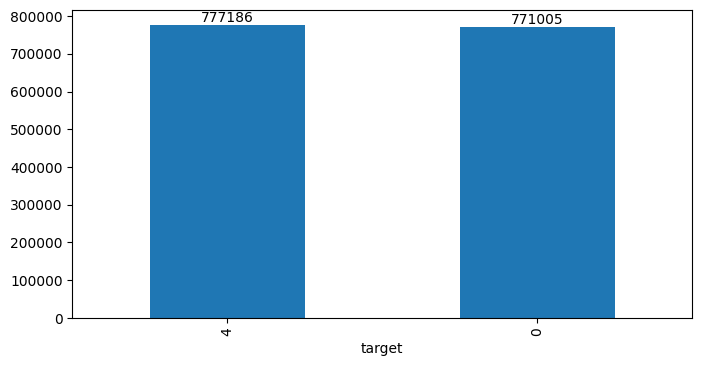

In [ ]:
ax=df.target.value_counts().plot(kind='bar', figsize=(8, 4))
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
from wordcloud import WordCloud

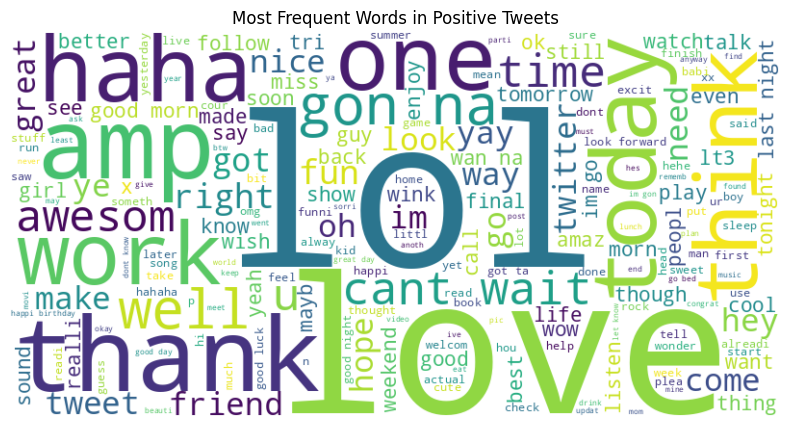

In [ ]:
positive_words = " ".join(df[df["target"] == 4]["processed_text"])
negative_words = " ".join(df[df["target"] == 0]["processed_text"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Positive Tweets")
plt.show()

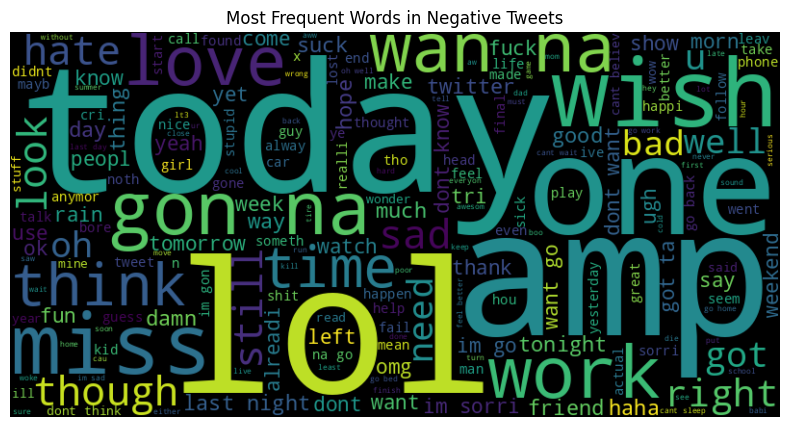

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color="black").generate(negative_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Tweets")
plt.show()

In [ ]:
from collections import Counter

# Count word frequencies for positive and negative tweets
positive_word_freq = Counter(positive_words.split())
negative_word_freq = Counter(negative_words.split())

# Get the top 10 most common words for positive and negative tweets
top_10_positive = positive_word_freq.most_common(10)
top_10_negative = negative_word_freq.most_common(10)

# Print the results
print("Top 10 words in positive tweets with their frequencies:")
for word, freq in top_10_positive:
    print(f"{word}: {freq}")

print("\nTop 10 words in negative tweets with their frequencies:")
for word, freq in top_10_negative:
    print(f"{word}: {freq}")

Top 10 words in positive tweets with their frequencies:
im: 74082
good: 59246
love: 58616
go: 57172
day: 50981
thank: 49422
get: 48132
like: 39823
lol: 33422
not: 33320

Top 10 words in negative tweets with their frequencies:
im: 101313
go: 76820
not: 73947
get: 60518
work: 54284
day: 47327
miss: 45389
dont: 43867
cant: 42622
like: 42371


In [ ]:
df['target'].replace(4, 1, inplace=True)

/tmp/ipykernel_35/486185613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['target'].replace(4, 1, inplace=True)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

# Tokenize the processed text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['processed_text'])
sequences = tokenizer.texts_to_sequences(df['processed_text'])

# Pad the sequences to ensure uniform length
max_sequence_length = max(len(seq) for seq in sequences)
sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Extract sentences as a list of tokenized words
sentences = [text.split() for text in df['processed_text']]

# Define the word index from the tokenizer
word_index = tokenizer.word_index

# Define the target variable y
y = df['target']

2025-05-20 05:24:56.548349: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747718696.784588      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747718696.854902      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split
import numpy as np
from gensim.models import Word2Vec

# Train the Word2Vec model using the sentences
word2vec_model = Word2Vec(sentences, vector_size=100, window=2, min_count=3)

# Create an embedding matrix
embedding_dim = 100  # Dimension of the word embeddings
vocab_size = len(word_index) + 1  # Adding 1 because of reserved 0 index
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]


# Prepare the data
X = np.array(sequences)  # Assuming `sequences` contains the tokenized and padded sequences
y = np.array(y)  # Convert the target column to a numpy array

# Split the dataset into 75-25 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=121)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model.add(SimpleRNN(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=1024)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2025-05-20 05:28:13.788729: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 59s 49ms/step - accuracy: 0.5024 - loss: 0.6931
Epoch 2/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accuracy: 0.5017 - loss: 0.6932
Epoch 3/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.5004 - loss: 0.6931
Epoch 4/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.5017 - loss: 0.6931
Epoch 5/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accuracy: 0.5010 - loss: 0.6931
Epoch 6/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.5019 - loss: 0.6931
Epoch 7/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.5013 - loss: 0.6931
Epoch 8/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.5019 - loss: 0.6931
Epoch 9/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 56s 49ms/step - accuracy: 0.5017 - loss: 0.6931
Epoch 10/10
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 57s 50ms/step - accuracy: 0.5014 - loss: 0.6931
12096/12096 ━━━━━━━━━━━━━━━━━━━━ 45s 4ms/step - accuracy: 0.5022 - loss: 0.6931
Test Loss: 0.693160

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from sklearn.metrics import classification_report

# Build the RNN + CNN model
model_cnn_rnn = Sequential()
model_cnn_rnn.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=X.shape[1], trainable=False))
model_cnn_rnn.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model_cnn_rnn.add(MaxPooling1D(pool_size=2))
model_cnn_rnn.add(SimpleRNN(128, activation='relu'))
model_cnn_rnn.add(Dropout(0.5))
model_cnn_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_cnn_rnn = model_cnn_rnn.fit(X_train, y_train, epochs=8, batch_size=1024)

# Evaluate the model

y_pred = (model_cnn_rnn.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

Epoch 1/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 152s 130ms/step - accuracy: 0.7257 - loss: 0.5281
Epoch 2/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 143s 126ms/step - accuracy: 0.7901 - loss: 0.4489
Epoch 3/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 144s 127ms/step - accuracy: 0.7971 - loss: 0.4372
Epoch 4/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 143s 126ms/step - accuracy: 0.8006 - loss: 0.4309
Epoch 5/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 143s 126ms/step - accuracy: 0.8036 - loss: 0.4256
Epoch 6/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 145s 127ms/step - accuracy: 0.8062 - loss: 0.4212
Epoch 7/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 145s 128ms/step - accuracy: 0.8080 - loss: 0.4168
Epoch 8/8
1134/1134 ━━━━━━━━━━━━━━━━━━━━ 144s 127ms/step - accuracy: 0.8103 - loss: 0.4129
12096/12096 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step
              precision    recall  f1-score   support

           0       0.79      0.80      0.80    192805
           1       0.80      0.79      0.80    194243

    accuracy                           0.80    387048
   macro